In [2]:
import cv2
import numpy as np
from numpy import asarray
from PIL import Image

import matplotlib.pyplot as plt

import tensorflow as tf

#sobel operator for edge detction (https://sbme-tutorials.github.io/2018/cv/notes/4_week4.html)
filter = [[-1, -2, 1],
          [0, 0, 0],
          [1, 2, 1]]

# a weight is required for normalisation
weight = 1

training_images = []
testing_images = []
training_labels = []
testing_labels = []
for i in range(44):
        training_labels.append(0)
        testing_labels.append(1)

In [3]:
for i in range(23):
        newImage = []
        img = Image.open(f'./hollow_shadowless_train/{i}.png')
        img = img.convert('L')
        i = asarray(img)

        i_transformed = np.copy(i)
        size_x = i_transformed.shape[0]
        size_y = i_transformed.shape[1]
        # apply the transformation
        for x in range(1, size_x-1):
                for y in range(1, size_y-1):
                        output_pixel = 0.0
                        output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
                        output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
                        output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
                        output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
                        output_pixel = output_pixel + (i[x, y] * filter[1][1])
                        output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
                        output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
                        output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
                        output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
                        output_pixel = output_pixel * weight
                        if(output_pixel<0):
                                output_pixel=0
                        if(output_pixel>255):
                                output_pixel=255
                        i_transformed[x, y] = output_pixel

                # plt.gray()
                # plt.grid(False)
                # plt.imshow(i_transformed)
                # plt.show()


                new_x = int(size_x/2)
                new_y = int(size_y/2)
                newImage = np.zeros((new_x, new_y))
                for x in range(0, size_x, 2):
                        for y in range(0, size_y, 2):
                                pixels = []
                                pixels.append(i_transformed[x, y])
                                pixels.append(i_transformed[x+1, y])
                                pixels.append(i_transformed[x, y+1])
                                pixels.append(i_transformed[x+1, y+1])
                                pixels.sort(reverse=True)
                                newImage[int(x/2), int(y/2)] = pixels[0]
                                
        training_images.append(newImage)

                # plt.gray()
                # plt.grid(False)
                # plt.imshow(newImage)
                # plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './hollow_shadowless_train/0.png'

In [4]:
for i in range(23,45):
        newImage = []
        img = Image.open(f'./hollow_shadowless_test/{i}.png')
        img = img.convert('L')
        i = asarray(img)

        i_transformed = np.copy(i)
        size_x = i_transformed.shape[0]
        size_y = i_transformed.shape[1]
        # apply the transformation
        for x in range(1, size_x-1):
                for y in range(1, size_y-1):
                        output_pixel = 0.0
                        output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
                        output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
                        output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
                        output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
                        output_pixel = output_pixel + (i[x, y] * filter[1][1])
                        output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
                        output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
                        output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
                        output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
                        output_pixel = output_pixel * weight
                        if(output_pixel<0):
                                output_pixel=0
                        if(output_pixel>255):
                                output_pixel=255
                        i_transformed[x, y] = output_pixel

                # plt.gray()
                # plt.grid(False)
                # plt.imshow(i_transformed)
                # plt.show()


                new_x = int(size_x/2)
                new_y = int(size_y/2)
                newImage = np.zeros((new_x, new_y))
                for x in range(0, size_x, 2):
                        for y in range(0, size_y, 2):
                                pixels = []
                                pixels.append(i_transformed[x, y])
                                pixels.append(i_transformed[x+1, y])
                                pixels.append(i_transformed[x, y+1])
                                pixels.append(i_transformed[x+1, y+1])
                                pixels.sort(reverse=True)
                                newImage[int(x/2), int(y/2)] = pixels[0]
                                
        testing_images.append(newImage)

                # plt.gray()
                # plt.grid(False)
                # plt.imshow(newImage)
                # plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './hollow_shadowless_test/23.png'

44


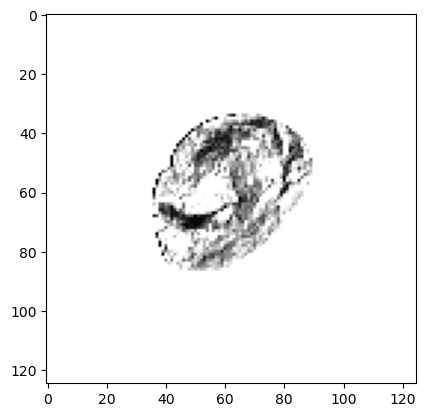

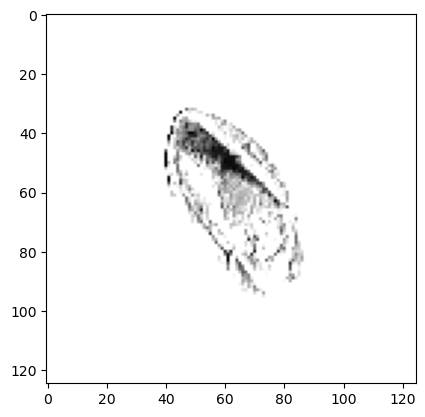

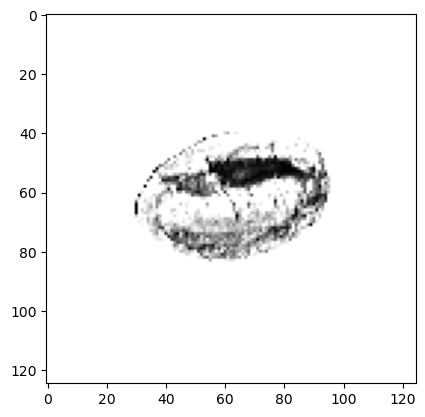

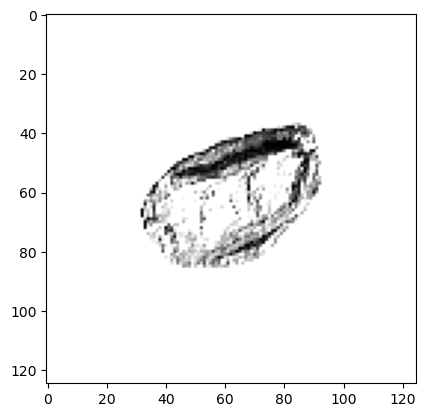

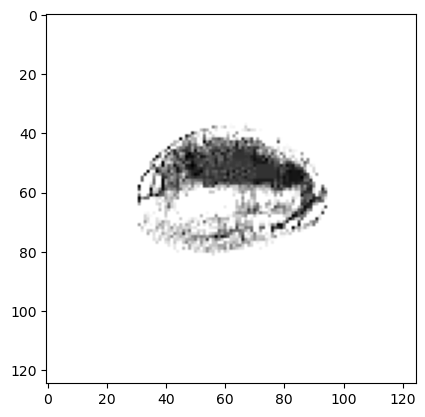

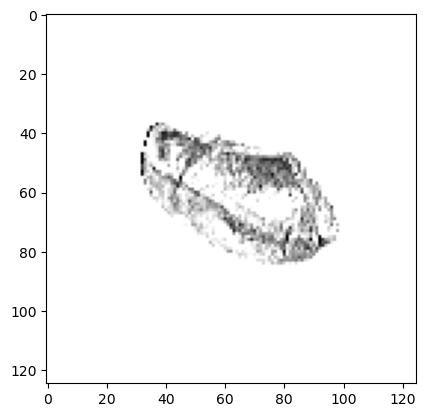

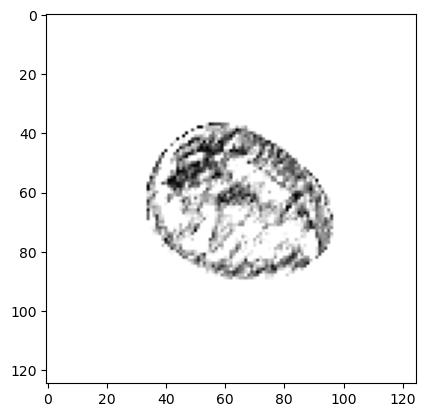

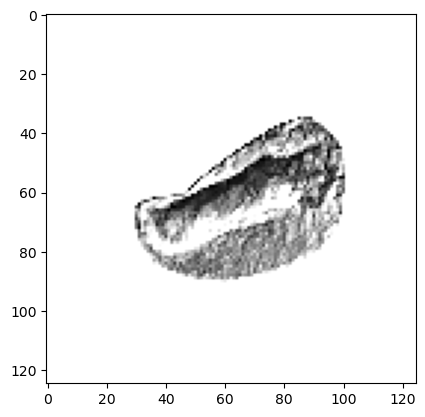

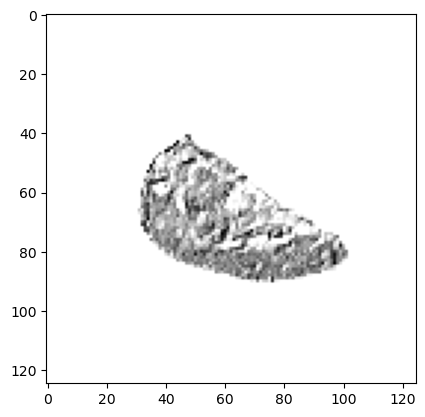

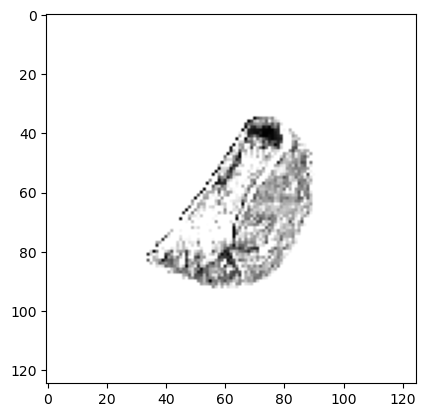

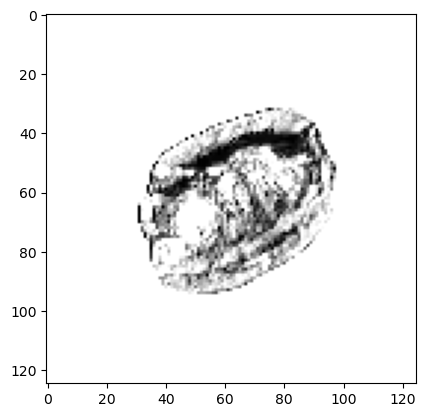

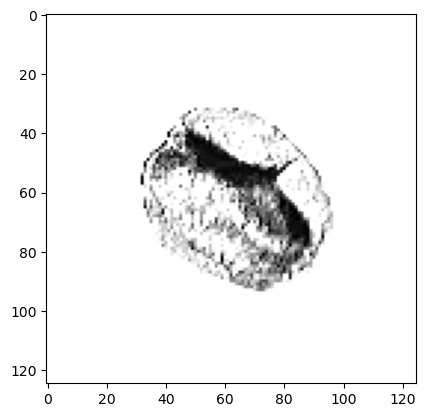

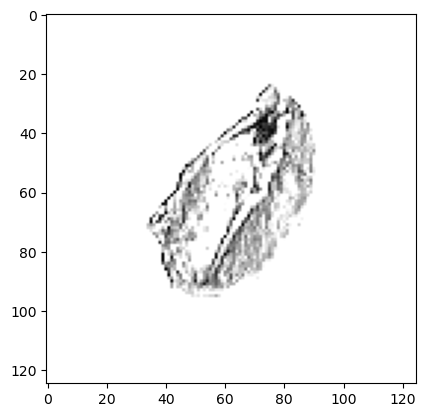

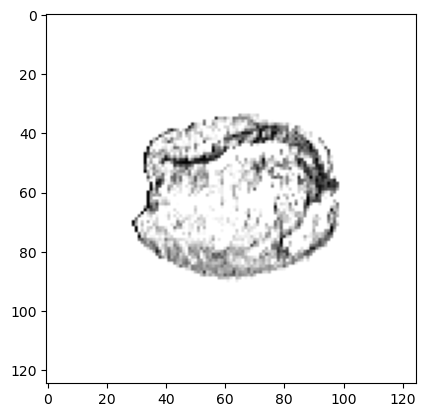

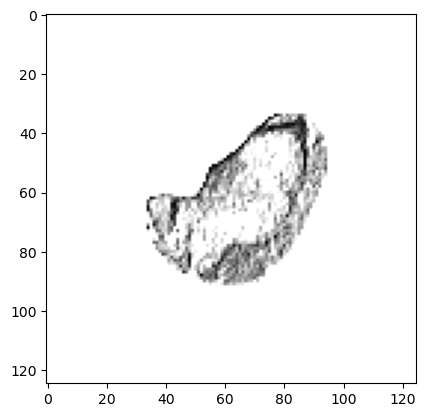

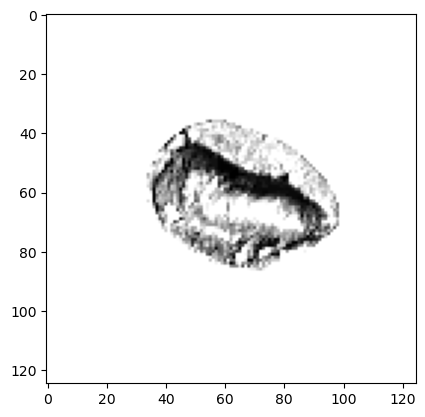

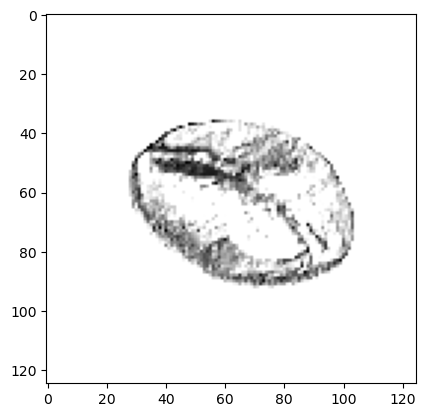

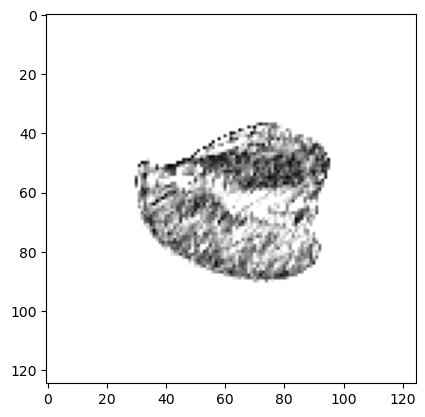

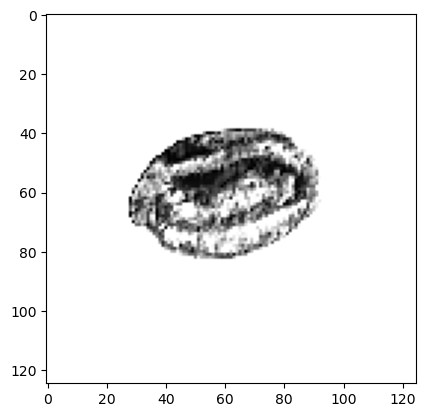

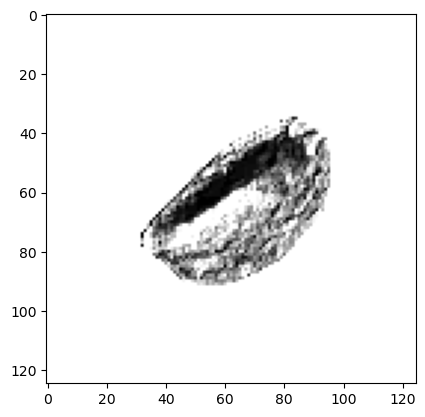

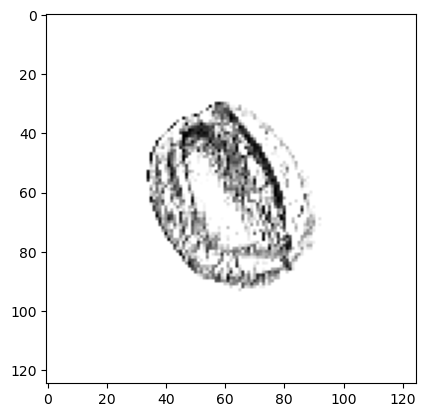

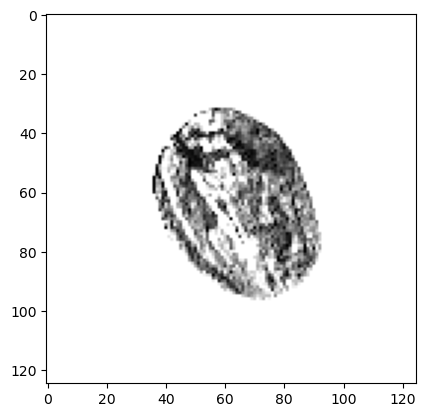

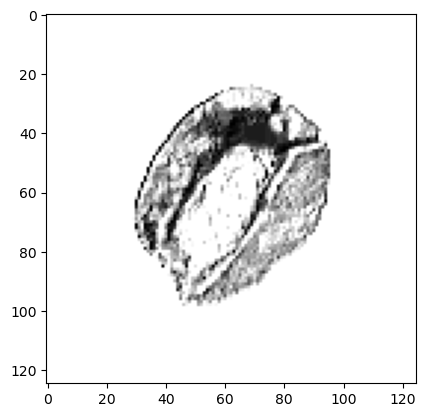

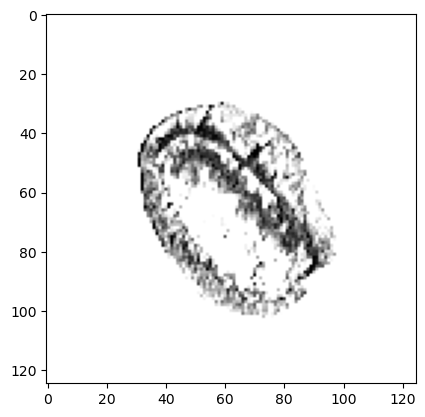

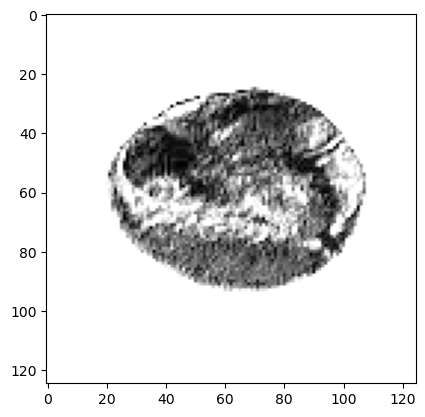

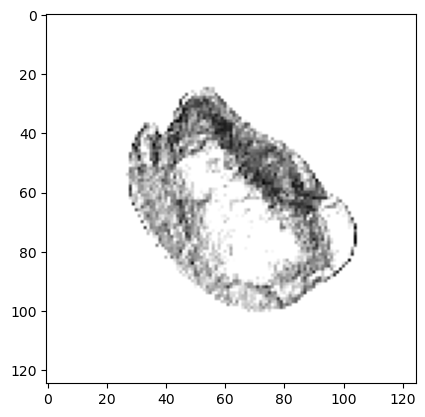

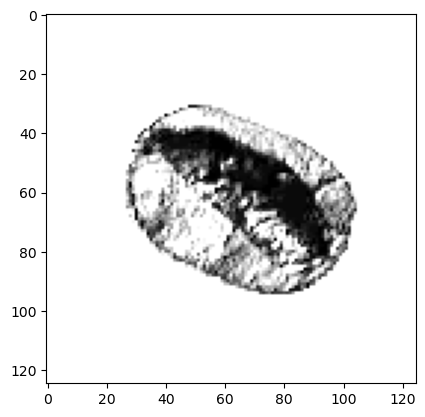

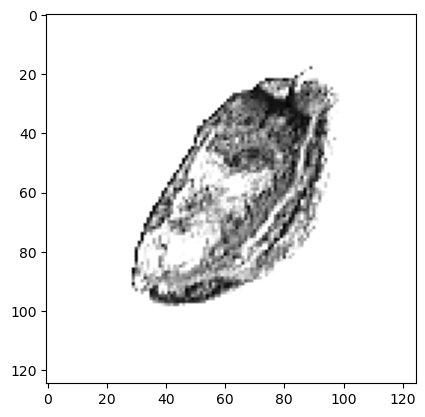

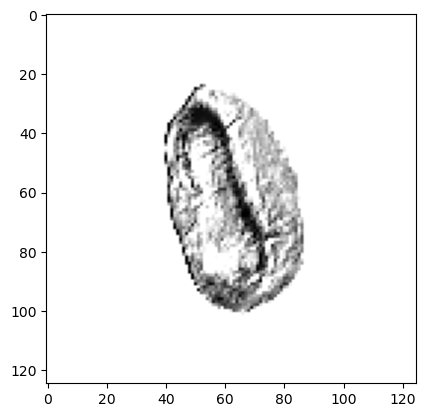

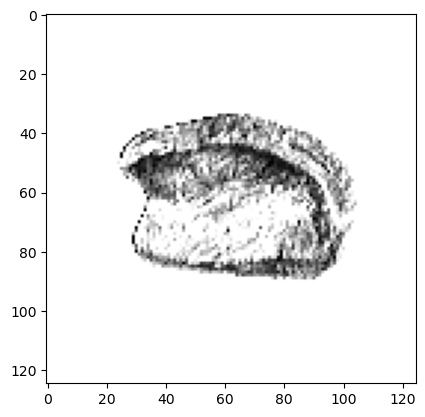

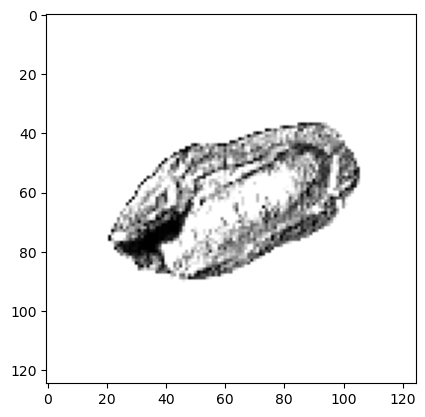

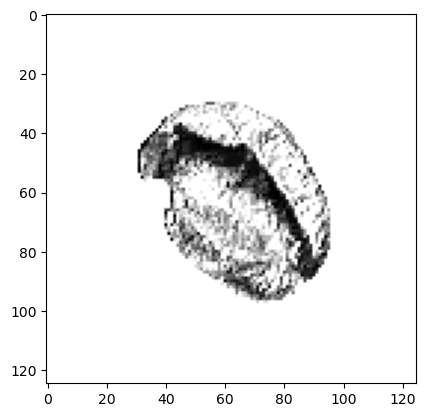

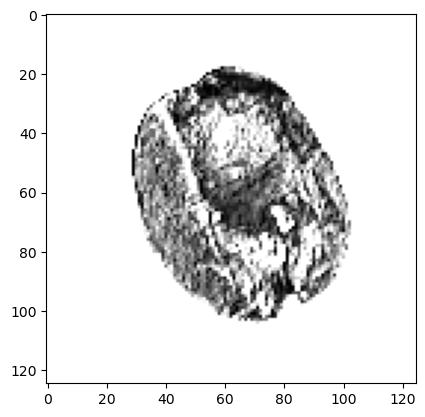

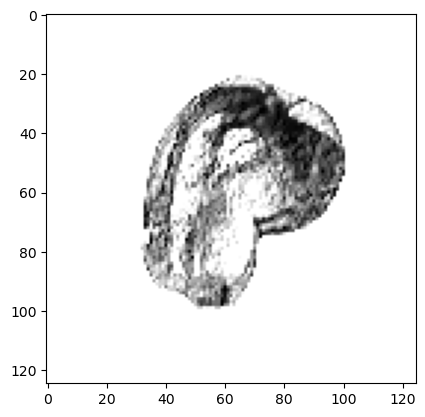

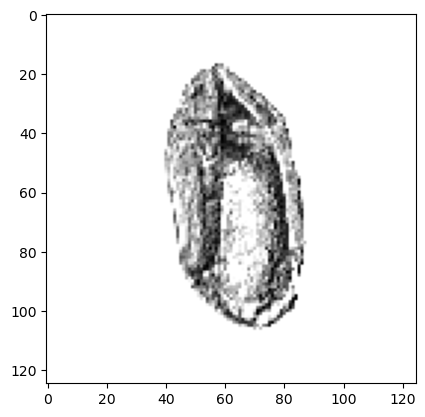

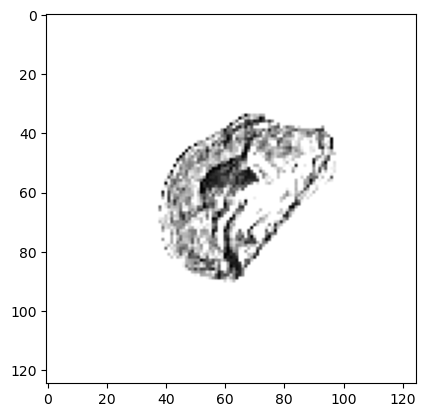

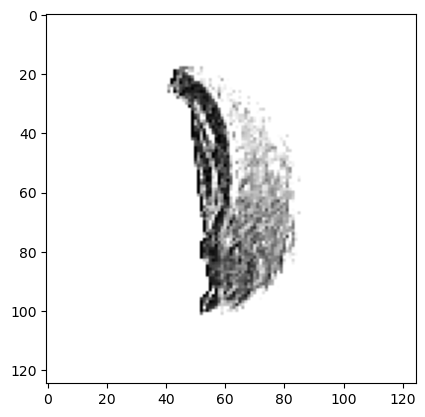

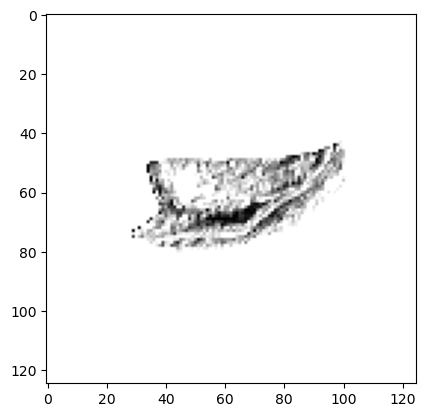

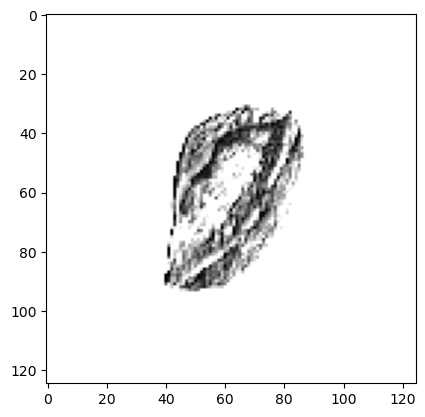

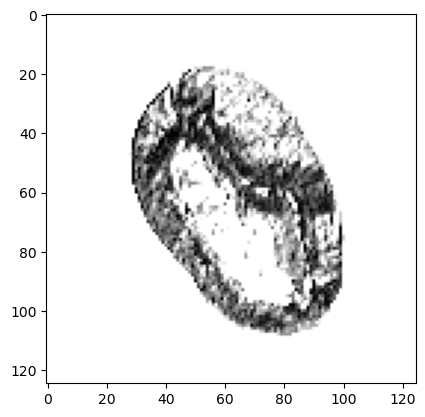

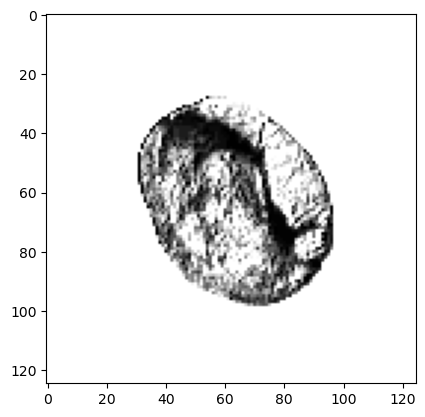

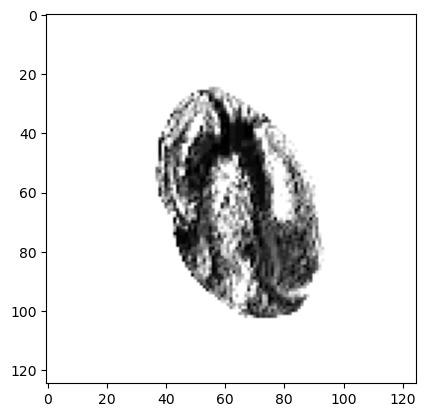

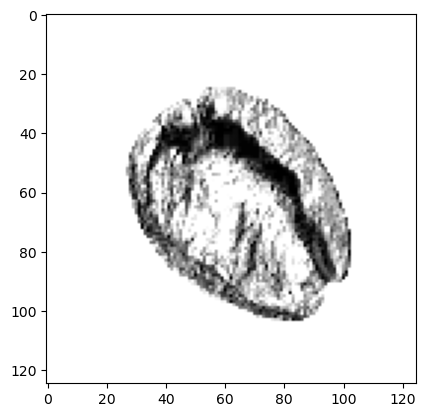

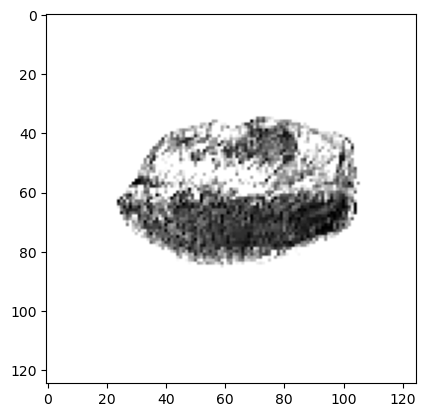

In [86]:
print(len(finalImages))

for i in finalImages:
        plt.gray()
        plt.grid(False)
        plt.imshow(i)
        plt.show()

In [ ]:
# mnist = tf.keras.datasets.fashion_mnist
# (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# training_images=training_images.reshape(60000, 28, 28, 1)
# training_images=training_images / 255.0
# test_images = test_images.reshape(10000, 28, 28, 1)
# test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=125, 125, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss, test_accuracy = model.evaluate(testing_images, testing_labels)
print ('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))